In [119]:
import pandas as pd

# max songs 114000
song_count = 114000
cluster_count = int(song_count/10)

data = pd.read_csv("./data/dataset.csv", usecols=['energy', 'valence', 'tempo', 'danceability', 'speechiness', 'track_id', 'track_name', 'artists', 'track_genre'])
subset_with_id_and_name = data.sample(song_count)
subset = subset_with_id_and_name[['energy','valence','tempo','danceability','speechiness']]


#popularity not this because we want to have unknown artists aswell
#danceability x
#loudness 
#speechiness x
#acousticness 
#instrumentalness 
#liveness 

In [120]:
print(len(subset))
display(subset.head(10))

114000


,energy,valence,tempo,danceability,speechiness
49644,0.941,0.696,139.991,0.662,0.0359
93973,0.352,0.395,101.006,0.369,0.0413
53744,0.854,0.620,121.998,0.728,0.0457
77088,0.745,0.793,80.024,0.332,0.0438
13160,0.545,0.726,95.310,0.810,0.0477
3766,0.745,0.465,83.918,0.449,0.0327
46711,0.964,0.241,172.100,0.644,0.0570
56743,0.565,0.549,101.985,0.866,0.0583
66100,0.576,0.943,131.970,0.823,0.0907
48956,0.894,0.677,154.068,0.536,0.0800


## Plot Subset

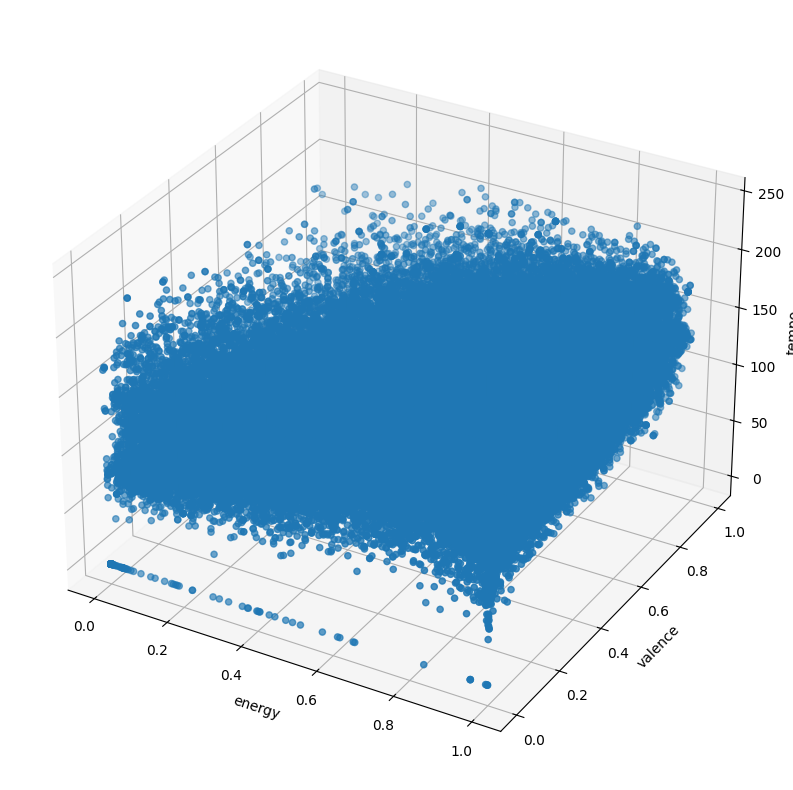

In [121]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(projection="3d")

ax.scatter(subset['energy'], subset['valence'], subset['tempo'])


ax.set_xlabel('energy')
ax.set_ylabel('valence')
ax.set_zlabel('tempo')

plt.show()

## Normalizing the data (Min Max Norming)

In [122]:
from sklearn import preprocessing

norm_subset = subset

norm_subset = (norm_subset - norm_subset.min()) / (norm_subset.max() - norm_subset.min())
print(norm_subset.head(10))
X_train_norm = norm_subset


       energy   valence     tempo  danceability  speechiness
49644   0.941  0.699497  0.575214      0.672081     0.037202
93973   0.352  0.396985  0.415027      0.374619     0.042798
53744   0.854  0.623116  0.501282      0.739086     0.047358
77088   0.745  0.796985  0.328814      0.337056     0.045389
13160   0.545  0.729648  0.391623      0.822335     0.049430
3766    0.745  0.467337  0.344814      0.455838     0.033886
46711   0.964  0.242211  0.707148      0.653807     0.059067
56743   0.565  0.551759  0.419050      0.879188     0.060415
66100   0.576  0.947739  0.542256      0.835533     0.093990
48956   0.894  0.680402  0.633056      0.544162     0.082902


### Plot normalized Data

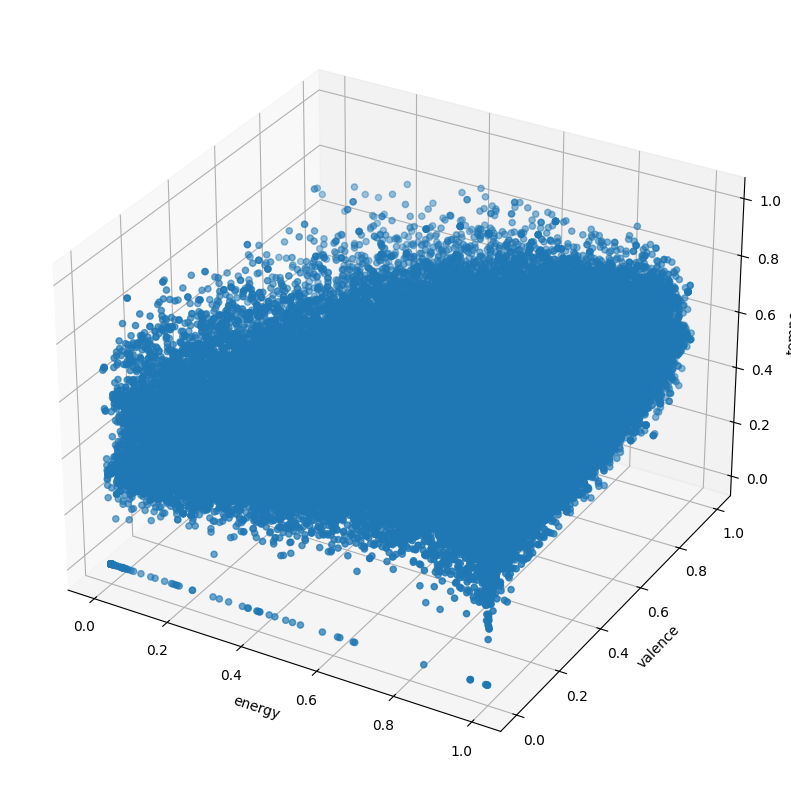

In [123]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(projection="3d")

ax.scatter(norm_subset['energy'], norm_subset['valence'], norm_subset['tempo'])

ax.set_xlabel('energy')
ax.set_ylabel('valence')
ax.set_zlabel('tempo')

plt.show()

## Generating random Entry from normalized data sample

In [133]:
X_train_norm['org_index'] = subset_with_id_and_name.index
start_value = X_train_norm.sample(1)
print(start_value)

      energy   valence     tempo  danceability  speechiness  org_index
1770   0.933  0.867337  0.475449       0.71066     0.062694       1770


## KMeans Clustering

In [125]:
def get_cluster(data, labels, start_label):
    cluster_points = data[labels == start_label]
    return cluster_points

In [126]:

from sklearn.cluster import KMeans
from tabulate import tabulate



kmeans = KMeans(n_clusters = cluster_count, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

start_label = kmeans.predict(start_value)
labels = kmeans.labels_

cluster_points = get_cluster(X_train_norm, labels, start_label)

original_indices = cluster_points['org_index']

print_table_kMeans = []
value_list_kMeans = []

for index in original_indices:
    print_table_kMeans.append([subset_with_id_and_name.loc[index].artists, subset_with_id_and_name.loc[index].track_name, subset_with_id_and_name.loc[index].track_genre])
    value_list_kMeans.append([X_train_norm.loc[index].energy, X_train_norm.loc[index].valence, X_train_norm.loc[index].tempo, X_train_norm.loc[index].danceability, X_train_norm.loc[index].speechiness])
    
print(tabulate(print_table_kMeans, headers=['Artists','Trackname','Genre'])) 


Artists                    Trackname                                Genre
-------------------------  ---------------------------------------  -----------
Samael                     Year Zero                                black-metal
Sarcófago                  Schreeches from the Silence              black-metal
Anaal Nathrakh             A Metaphor For The Dead                  black-metal
Sodom                      Napalm in the Morning (2021 - Remaster)  black-metal
Sarcófago                  The Laws of Scourge                      black-metal
Batushka                   Yekteniya I                              black-metal
Sarcófago                  Prelude to a Suicide                     black-metal
Toxic Holocaust            Send Them to Hell                        black-metal
Morbid Angel               Paradigms Warped                         black-metal
Sarcófago                  Desecration of Virgin                    black-metal
Wolves In The Throne Room  Subterranean Initia

In [127]:
print(original_indices)

6343    6343
6348    6348
6346    6346
6351    6351
6342    6342
6350    6350
6341    6341
6344    6344
6345    6345
6349    6349
6347    6347
Name: org_index, dtype: int64


# Nearest Neighbours

In [128]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

samples = X_train_norm

neigh = NearestNeighbors(n_neighbors=10)
neigh.fit(samples)
neighbour_indizes = neigh.kneighbors(start_value.to_numpy(), 10, return_distance=False)
    
print(neighbour_indizes)

[[ 91231  16358  61004  24669 112880  31452  18373  75601  97942  41884]]


c:\Users\Scheske\Documents\Private\Studium Ohm\Semester 7\Bionic Computing\BionicComputing\sklearn-env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


## Extract Songs via indizes

In [134]:
print_table_kNearest = []
value_list_kNearest = []
org_indices_kNearest = []

# Get original indices
for index in neighbour_indizes:
    org_indices_kNearest.append(subset_with_id_and_name.iloc[index].index)

org_indices_kNearest = org_indices_kNearest[0]
print(org_indices_kNearest)

for index in org_indices_kNearest:
    print_table_kNearest.append([subset_with_id_and_name.loc[index].artists, subset_with_id_and_name.loc[index].track_name, subset_with_id_and_name.loc[index].track_genre])
    value_list_kNearest.append([X_train_norm.loc[index].energy, X_train_norm.loc[index].valence, X_train_norm.loc[index].tempo, X_train_norm.loc[index].danceability, X_train_norm.loc[index].speechiness])

Index([6349, 6348, 6350, 6351, 6347, 6352, 6346, 6345, 6353, 6354], dtype='int64')


## Evaluating both algorithms

In [130]:
print("Starting Track")
print(tabulate(subset_with_id_and_name.loc[start_value.org_index]))

print("\n\nKNearest Neighbours")
print(tabulate(print_table_kNearest, headers=['Artists','Trackname','Genre']))  

print("\n\nKMeans Clustering")
print(tabulate(print_table_kMeans, headers=['Artists','Trackname','Genre']))

Starting Track
----  ----------------------  ---------  ---------------------  -----  -----  ------  -----  ------  -----------
6349  12rctrKl8dkkwksL2MM2HZ  Sarcófago  Desecration of Virgin  0.195  0.759  0.0535  0.403  90.216  black-metal
----  ----------------------  ---------  ---------------------  -----  -----  ------  -----  ------  -----------


KNearest Neighbours
Artists                             Trackname                                Genre
----------------------------------  ---------------------------------------  -----------
Sarcófago                           Desecration of Virgin                    black-metal
Sarcófago                           Schreeches from the Silence              black-metal
Batushka                            Yekteniya I                              black-metal
Sodom                               Napalm in the Morning (2021 - Remaster)  black-metal
Wolves In The Throne Room           Subterranean Initiation                  black-metal
Mork   

## Calculating ndcg Score

In [131]:
import numpy as np
from sklearn.metrics import ndcg_score

print(start_value)

# ground truth = energy, valence, tempo of starting song
start_value_array = [[start_value.iloc[0]['energy'], start_value.iloc[0]['valence'], start_value.iloc[0]['tempo'], start_value.iloc[0]['danceability'], start_value.iloc[0]['speechiness']]]
#print(start_value_array)
#print(value_list_kMeans)
#print(value_list_kNearest)

score_array_kMeans = []
# calculating ndcg score for KMeans list
for entry in value_list_kMeans:
    score_array_kMeans.append(ndcg_score(start_value_array, [entry]))
    
#print("X")
#print(score_array_kMeans)


score_array_kNearest = []
# calculating ndcg score for KNearest list
for entry in value_list_kNearest:
    score_array_kNearest.append(ndcg_score(start_value_array, [entry]))
    

# Calc average of kMeans Scores
avg_kMeans = sum(score_array_kMeans) / len(score_array_kMeans)


# Calc average of kNearest Scores
avg_kNearest = sum(score_array_kNearest) / len(score_array_kNearest)

print("\n\nAverage scores of kMeans and kNearest")
print("kMeans:", round(avg_kMeans, 3))
print("kNearest:", round(avg_kNearest, 3))

      energy   valence     tempo  danceability  speechiness  org_index
6349   0.759  0.405025  0.370692       0.19797      0.05544       6349


Average scores of kMeans and kNearest
kMeans: 0.986
kNearest: 0.985


- Prototype interface
- New Columns
- User Tests
